# Accident Risk Prediction Model


In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

## Generating Synthetic Data
We create a synthetic dataset to simulate accident-related features

In [2]:
np.random.seed(42) 
N = 5000 

# Create a synthetic dataset with various features
df = pd.DataFrame({ 
    "speed": np.random.normal(45, 10, N), 
    "driver_fatigue": np.random.uniform(0, 10, N), 
    "traffic_density": np.random.uniform(0, 1, N), 
    "visibility": np.random.normal(600, 200, N), 
    "brake_events": np.random.poisson(3, N), 
    "hour": np.random.randint(5, 18, N), 
    "road_type": np.random.choice(["highway", "city", "rural"], N), 
    "weather": np.random.choice(["clear", "rain", "fog"], N, p=[0.6, 0.25, 0.15]) 
})

In [3]:
df

,speed,driver_fatigue,traffic_density,visibility,brake_events,hour,road_type,weather
0,49.967142,1.682366,0.312656,345.357445,3,8,city,clear
1,43.617357,1.899347,0.178233,336.440050,7,7,rural,clear
2,51.476885,4.607122,0.859182,157.146363,2,14,city,clear
3,60.230299,2.862799,0.403523,763.506902,7,11,highway,clear
4,42.658466,2.474630,0.398544,765.531502,0,14,city,rain
...,...,...,...,...,...,...,...,...
4995,44.510350,1.402850,0.636944,641.363272,2,8,rural,fog
4996,52.114106,8.865641,0.746460,464.116088,4,8,city,clear
4997,76.129102,7.297726,0.927614,658.116070,2,16,rural,fog
4998,53.080362,1.646703,0.646860,816.316146,3,9,highway,rain


In [4]:
# Clip the speed and visibility values to make them stay within bounds
df["speed"] = df["speed"].clip(lower=10) 
df["visibility"] = df["visibility"].clip(lower=50)

## Risk Score and Target Variable Calculation

In [5]:
# Calculate a risk score based on various features
risk_score = ( 
    0.03 * df["speed"] +  # Higher speed increases risk
    0.2 * df["driver_fatigue"] +  # Driver fatigue contributes significantly to risk
    0.5 * df["traffic_density"] +  # Denser traffic leads to higher risk
    0.4 * (df["weather"] == "fog").astype(int) +  # Foggy weather increases risk
    0.3 * (df["road_type"] == "highway").astype(int) +  # Highways are riskier
    0.2 * df["brake_events"]  # Frequent braking indicates risky driving
)

# Convert the risk score into probabilities using the sigmoid function
# The sigmoid function turns any number into a value between 0 and 1
prob = 1 / (1 + np.exp(-risk_score))

# Define a threshold for classifying high-risk cases
threshold = np.percentile(prob, 70) 

# Create a binary target variable for accident risk
df["accident_risk"] = (prob > threshold).astype(int)

In [6]:
print("\nTarget distribution:") 
print(df["accident_risk"].value_counts())


Target distribution:
accident_risk
0    3500
1    1500
Name: count, dtype: int64


In [7]:
# Save dataset to CSV 
df.to_csv("school_bus_accident_data.csv", index=False)

In [8]:
# Separate the features (X) from the target variable (y)
X = df.drop("accident_risk", axis=1)

In [9]:
X

,speed,driver_fatigue,traffic_density,visibility,brake_events,hour,road_type,weather
0,49.967142,1.682366,0.312656,345.357445,3,8,city,clear
1,43.617357,1.899347,0.178233,336.440050,7,7,rural,clear
2,51.476885,4.607122,0.859182,157.146363,2,14,city,clear
3,60.230299,2.862799,0.403523,763.506902,7,11,highway,clear
4,42.658466,2.474630,0.398544,765.531502,0,14,city,rain
...,...,...,...,...,...,...,...,...
4995,44.510350,1.402850,0.636944,641.363272,2,8,rural,fog
4996,52.114106,8.865641,0.746460,464.116088,4,8,city,clear
4997,76.129102,7.297726,0.927614,658.116070,2,16,rural,fog
4998,53.080362,1.646703,0.646860,816.316146,3,9,highway,rain


In [10]:
# Extracting target variable 
y = df["accident_risk"]

In [11]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4995    0
4996    1
4997    1
4998    0
4999    0
Name: accident_risk, Length: 5000, dtype: int64

In [12]:
# Split the dataset into training and testing sets
# Stratified sampling ensures the target variable distribution is maintained
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,  
    random_state=42,  
    stratify=y  # Maintains the proportion of classes in the split
)

In [13]:
# Identify categorical and numerical columns for preprocessing
categorical_cols = ["road_type", "weather"]  # Columns with non-numeric data
numeral_cols = X.select_dtypes(include=[np.number]).columns.tolist()  # Numeric columns

In [14]:
categorical_cols

['road_type', 'weather']

In [15]:
numeral_cols

['speed',
 'driver_fatigue',
 'traffic_density',
 'visibility',
 'brake_events',
 'hour']

## Exploratory Data Analysis (EDA)

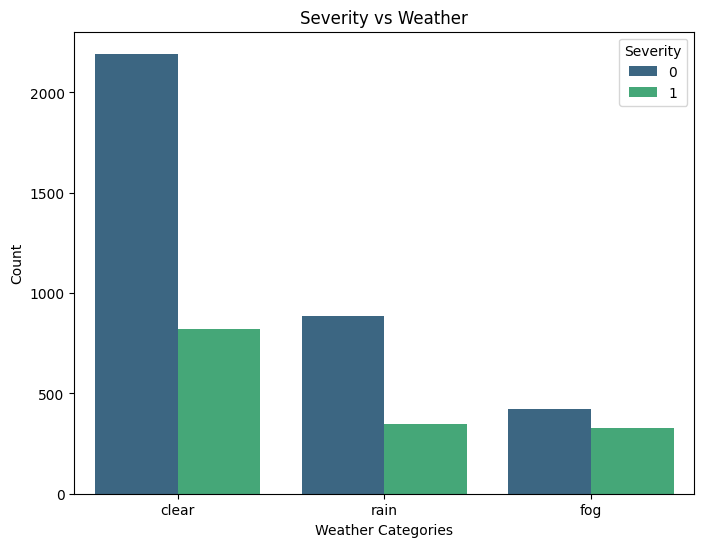

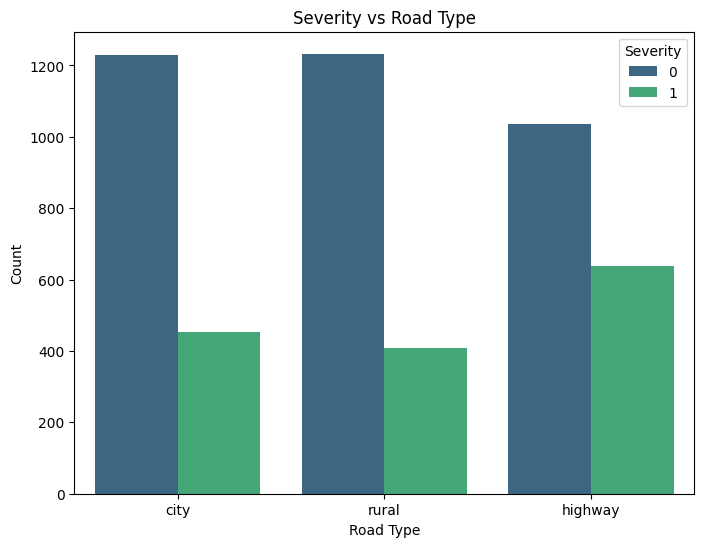

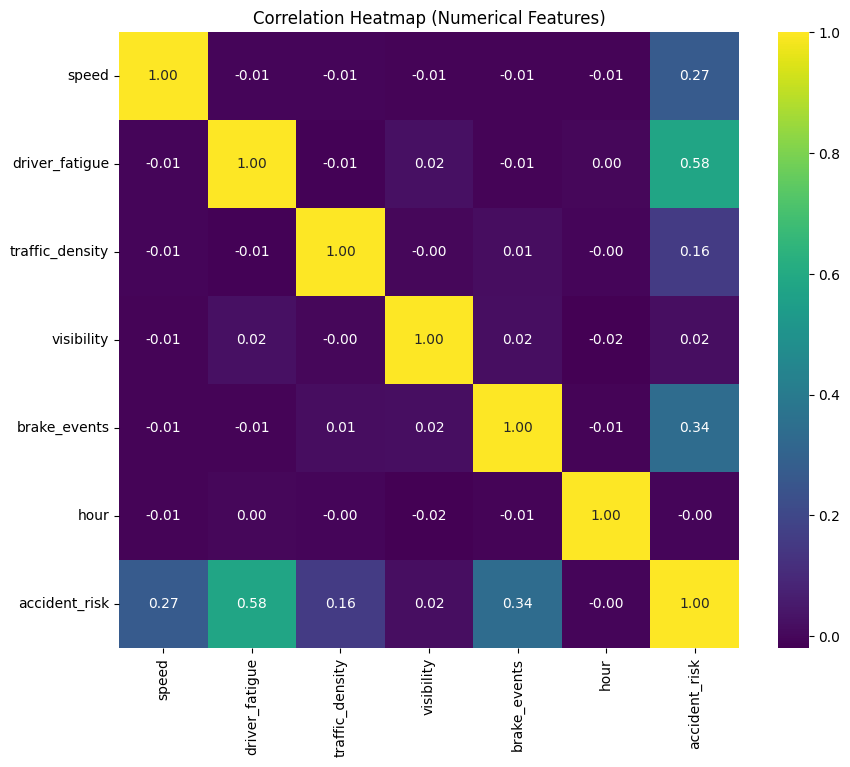

In [ ]:
# Plot: Severity vs Weather
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="weather", hue="accident_risk", palette="viridis")
plt.title("Severity vs Weather")
plt.xlabel("Weather Categories")
plt.ylabel("Count")
plt.legend(title="Severity")
plt.show()


# Plot: Severity vs Road Type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="road_type", hue="accident_risk", palette="viridis")
plt.title("Severity vs Road Type")
plt.xlabel("Road Type")
plt.ylabel("Count")
plt.legend(title="Severity")
plt.show()

# Correlation Heatmap
# Drop categorical columns for correlation analysis
numerical_df = df.select_dtypes(include=["number"])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

In [1]:
# Interpretation of Visualizations:

# Severity vs Weather- 
# This plot shows how accident severity varies across different weather conditions. 
# Clear weather might have fewer severe accidents compared to foggy conditions.

# Severity vs Road Type
# This plot highlights the distribution of accident severity across different 
# road types. Highways might show a higher count of severe accidents compared 
# to rural roads.

# Correlation Heatmap
# The heatmap shows the correlation between numerical features. 
# Features with high correlation values might influence accident severity 
# significantly

## Feature Engineering

In [16]:
# Defining a preprocessing pipeline
# Numerical columns are passed through without changes 
# Categorical columns are one-hot encoded to convert them into numerical format
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeral_cols),
        ("cat", OneHotEncoder(
            drop="first",  # Avoids the dummy variable trap
            handle_unknown="ignore"  # Ignores unknown categories during transformation
        ), categorical_cols)
    ]
)

### Pipelining and Encoding

### What is Pipelining?
Pipelining is a way to organize the steps of data preprocessing and model training into a single, streamlined process. Instead of manually applying transformations (like scaling or encoding) and then training the model, a pipeline ensures that these steps happen automatically and in the correct order. This makes the process easier to manage and reduces the chances of errors.

### What is Encoding?
Encoding is the process of converting categorical data into numerical values so ML models can understand and work with it. Since ML algorithms perform mathematical operations, they cannot directly process strings like “Male”, “Red”, or “High”. Encoding transforms these categories into numbers while trying to preserve meaning.

#### Types of Encoding:
1. **Label Encoding**: Assigns a unique integer to each category. Use it when the categorical data is ordinal, meaning the categories have a natural order or ranking.
2. **One-Hot Encoding**: Converts each category into a separate binary feature. Use it for nominal categorical data where categories do not have any meaningful order. Be cautious as it can create many columns if there are too many unique categories.
3. **Ordinal Encoding**: Similar to label encoding but explicitly used when the order is meaningful and known. Use it when the order matters and the relative ranking between categories is important for prediction.
4. **Target Encoding (Mean Encoding)**: Replaces each category with the average value of the target variable for that category. Use it for high-cardinality categorical features (many unique categories) and when there is a strong relationship with the target variable.
5. **Binary Encoding**: Converts categories to numbers, then represents them in binary form. Use it when there are many unique categories and you want to reduce the number of new features compared to one-hot encoding.
6. **Frequency Encoding**: Replaces categories with their frequency or count in the dataset. Use it when the occurrence count of a category carries meaningful information.

In [17]:
df

,speed,driver_fatigue,traffic_density,visibility,brake_events,hour,road_type,weather,accident_risk
0,49.967142,1.682366,0.312656,345.357445,3,8,city,clear,0
1,43.617357,1.899347,0.178233,336.440050,7,7,rural,clear,0
2,51.476885,4.607122,0.859182,157.146363,2,14,city,clear,0
3,60.230299,2.862799,0.403523,763.506902,7,11,highway,clear,1
4,42.658466,2.474630,0.398544,765.531502,0,14,city,rain,0
...,...,...,...,...,...,...,...,...,...
4995,44.510350,1.402850,0.636944,641.363272,2,8,rural,fog,0
4996,52.114106,8.865641,0.746460,464.116088,4,8,city,clear,1
4997,76.129102,7.297726,0.927614,658.116070,2,16,rural,fog,1
4998,53.080362,1.646703,0.646860,816.316146,3,9,highway,rain,0


## Model Training

In [18]:
# Define a dictionary of models to train
models = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000,  
        solver="lbfgs"  
    ),
    "Decision Tree": DecisionTreeClassifier(
        max_depth=6,  
        random_state=42 
    ),
    "Random Forests": RandomForestClassifier(
        n_estimators=200, 
        random_state=42,  
        n_jobs=-1  
    )
}

In [19]:
# Train each model using a pipeline
# The pipeline ensures preprocessing and modeling steps are applied sequentially
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessing", preprocessor),  # Preprocess the data
        ("model", model)  # Train the model
    ])

In [ ]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)
# Make predictions on the test data
y_pred = pipeline.predict(X_test)

## Model Evaluation

In [24]:
# Evaluating performance of all three models
for name, model in models.items():
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")  # Print accuracy
    print(classification_report(y_test, y_pred))  # Detailed classification metrics

Model: Logistic Regression
Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       875
           1       0.95      0.90      0.92       375

    accuracy                           0.96      1250
   macro avg       0.96      0.94      0.95      1250
weighted avg       0.96      0.96      0.96      1250

Model: Decision Tree
Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       875
           1       0.95      0.90      0.92       375

    accuracy                           0.96      1250
   macro avg       0.96      0.94      0.95      1250
weighted avg       0.96      0.96      0.96      1250

Model: Random Forests
Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       875
           1       0.95      0.90      0.92       375

    accuracy                           0.96      1250
   macro avg 